## EDA and Preprocessing - AUTOMOBILE CARS

1. Basic EDA - Info, shape

2. Handling Missing Values

3. Handling Outliers

4. Handling Skewness

5. Categorical Data Encoding

6. Data Normalization or Scaling

6. Feature Engineering


Next ---> Model selection --> Supervised LEarning --> regression (price predict ) --> Linear Regression(y = mx+c)
sklean  library --> ML model -->

pip install scikit-learn

In [90]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
# data import
df = pd.read_csv(r"Car_sales.csv")
df.head(10)

,Manufacturer,Model,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Sales_in_thousands
0,Acura,Integra,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150,16.919
1,Acura,TL,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778,39.384
2,Acura,CL,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,NaN,14.114
3,Acura,RL,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779,8.588
4,Audi,A4,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639,20.397
5,Audi,A6,23.555,Passenger,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,08-09-2011,84.565105,18.780
6,Audi,A8,39.000,Passenger,62.00,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858,24.430
7,BMW,323i,NaN,Passenger,26.99,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207,19.747
8,BMW,328i,28.675,Passenger,33.40,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069,9.231
9,BMW,528i,36.125,Passenger,38.90,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,04-04-2011,83.998724,17.527


In [ ]:
# shape
df.shape
# dimensions
df.ndim
# # number of datas
df.size

# # basic info
df.info()
# # column names
df.columns
# # data type 
df.dtypes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   __year_resale_value  121 non-null    float64
 3   Vehicle_type         157 non-null    object 
 4   Price_in_thousands   155 non-null    float64
 5   Engine_size          156 non-null    float64
 6   Horsepower           156 non-null    float64
 7   Wheelbase            156 non-null    float64
 8   Width                156 non-null    float64
 9   Length               156 non-null    float64
 10  Curb_weight          155 non-null    float64
 11  Fuel_capacity        156 non-null    float64
 12  Fuel_efficiency      154 non-null    float64
 13  Latest_Launch        157 non-null    object 
 14  Power_perf_factor    155 non-null    float64
 15  Sales_in_thousands   157 non-null    flo

,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Sales_in_thousands
count,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000,157.000000
mean,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591,53.144892
std,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664,67.942126
min,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272,0.110000
25%,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707,14.351000
50%,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917,29.450000
75%,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878,67.956000
max,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323,540.561000


In [ ]:
# # basic statical summary
df.describe()

In [101]:
# # basic statical summary
df.describe(include ="O")
# # numerical and object
# # null values check

,Manufacturer,Model,Vehicle_type,Latest_Launch
count,157,157,157,157
unique,30,156,2,130
top,Dodge,Neon,Passenger,10-05-2012
freq,11,2,116,2


* Insights
 - 

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.dtypes

Manufacturer            object
Model                   object
__year_resale_value    float64
Vehicle_type            object
Price_in_thousands     float64
Engine_size            float64
Horsepower             float64
Wheelbase              float64
Width                  float64
Length                 float64
Curb_weight            float64
Fuel_capacity          float64
Fuel_efficiency        float64
Latest_Launch           object
Power_perf_factor      float64
Sales_in_thousands     float64
dtype: object

### Duplicate

In [ ]:
# check duplicate value
df.duplicated().sum()

0

In [103]:
# droped
df.drop_duplicates(inplace = True)


### Null value check

In [104]:
# null check 
df.isnull().sum()

Manufacturer            0
Model                   0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
Sales_in_thousands      0
dtype: int64

#### handle null value

1. replace
2. drop


In [105]:
df["Price_in_thousands"].isnull().sum()

2

In [106]:
df["Price_in_thousands"].mean()

27.390754838709682

In [ ]:
df["Price_in_thousands"].fillna(df["Price_in_thousands"].mean())

In [108]:
# replace
df["Price_in_thousands"] =  df["Price_in_thousands"].fillna(df["Price_in_thousands"].mean())
# delete

In [109]:
df["Price_in_thousands"].isnull().sum()

0

In [110]:
# null check 
df.isnull().sum()

Manufacturer            0
Model                   0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      0
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
Sales_in_thousands      0
dtype: int64

In [ ]:
df["__year_resale_value"] =  df["__year_resale_value"].fillna(df["__year_resale_value"].mean())
# delete

In [ ]:

j="__year_resale_value"

# replace
df[j] =  df[j].fillna(df[j].mean())



In [ ]:
j="Manufacturer"
if df[j].dtype =="O":
    print("obj")
else:
    print(df[j].mean())

obj


In [ ]:
for  i in df.columns:
    print(i)
    

In [120]:
for  i in df.columns:
    print(i)

    if df[i].dtype =="O":
        print("obi")
    else:
        print(df[i].mean())
        # replace
        df[i] =  df[i].fillna(df[i].mean())

Manufacturer
obi
Model
obi
__year_resale_value
18.07297520661157
Vehicle_type
obi
Price_in_thousands
27.390754838709682
Engine_size
3.0608974358974357
Horsepower
185.94871794871796
Wheelbase
107.48717948717946
Width
71.15
Length
187.34358974358975
Curb_weight
3.378025806451613
Fuel_capacity
17.951923076923077
Fuel_efficiency
23.844155844155843
Latest_Launch
obi
Power_perf_factor
77.0435912007742
Sales_in_thousands
53.14489171974522


In [121]:
# null check 
df.isnull().sum()

Manufacturer           0
Model                  0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
Sales_in_thousands     0
dtype: int64

In [13]:
df.head()

,Manufacturer,Model,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Sales_in_thousands
0,Acura,Integra,16.360,Passenger,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150,16.919
1,Acura,TL,19.875,Passenger,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778,39.384
2,Acura,CL,18.225,Passenger,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,NaN,14.114
3,Acura,RL,29.725,Passenger,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779,8.588
4,Audi,A4,22.255,Passenger,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639,20.397


In [14]:
df["Horsepower"].dtypes

dtype('float64')

In [15]:
for i in df.columns:

    if df[i].dtypes !="object":
        # replace
        df[i] =  df[i].fillna(df[i].mean())
        
        print(i, "--->",df[i].dtypes )

__year_resale_value ---> float64
Price_in_thousands ---> float64
Engine_size ---> float64
Horsepower ---> float64
Wheelbase ---> float64
Width ---> float64
Length ---> float64
Curb_weight ---> float64
Fuel_capacity ---> float64
Fuel_efficiency ---> float64
Power_perf_factor ---> float64
Sales_in_thousands ---> float64


In [16]:
# replace null values
for i in df.columns:
    if df[i].dtypes !="object":
        # replace
        df[i] =  df[i].fillna(df[i].mean())
        
        print(i, "--->",df[i].dtypes )

__year_resale_value ---> float64
Price_in_thousands ---> float64
Engine_size ---> float64
Horsepower ---> float64
Wheelbase ---> float64
Width ---> float64
Length ---> float64
Curb_weight ---> float64
Fuel_capacity ---> float64
Fuel_efficiency ---> float64
Power_perf_factor ---> float64
Sales_in_thousands ---> float64


In [17]:
# null check 
df.isnull().sum()

Manufacturer           0
Model                  0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
Sales_in_thousands     0
dtype: int64

In [18]:
df["Manufacturer"].mode()[0]

'Dodge'

In [19]:
# save the clean data 
df.to_csv("clean_car_data.csv")

In [20]:
# load the data 
df1 = pd.read_csv("clean_car_data.csv")

In [21]:
df1.head()

,Unnamed: 0,Manufacturer,Model,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Sales_in_thousands
0,0,Acura,Integra,16.360,Passenger,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150,16.919
1,1,Acura,TL,19.875,Passenger,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778,39.384
2,2,Acura,CL,18.225,Passenger,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,77.043591,14.114
3,3,Acura,RL,29.725,Passenger,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779,8.588
4,4,Audi,A4,22.255,Passenger,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639,20.397


## Analysis of data  

 - uni-variant analysis --> single column analysis
 - bi-variant analysis --> 2 0r more than 2 column analysis 
 

In [22]:
# count the number of sale in each manufactuer
df["Manufacturer"].value_counts()

Manufacturer
Dodge         11
Ford          11
Toyota         9
Chevrolet      9
Mercedes-B     9
Mitsubishi     7
Nissan         7
Chrysler       7
Volvo          6
Oldsmobile     6
Lexus          6
Mercury        6
Pontiac        6
Volkswagen     6
Saturn         5
Cadillac       5
Honda          5
Plymouth       4
Acura          4
Buick          4
Audi           3
Jeep           3
Porsche        3
Hyundai        3
BMW            3
Lincoln        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: count, dtype: int64

<BarContainer object of 30 artists>

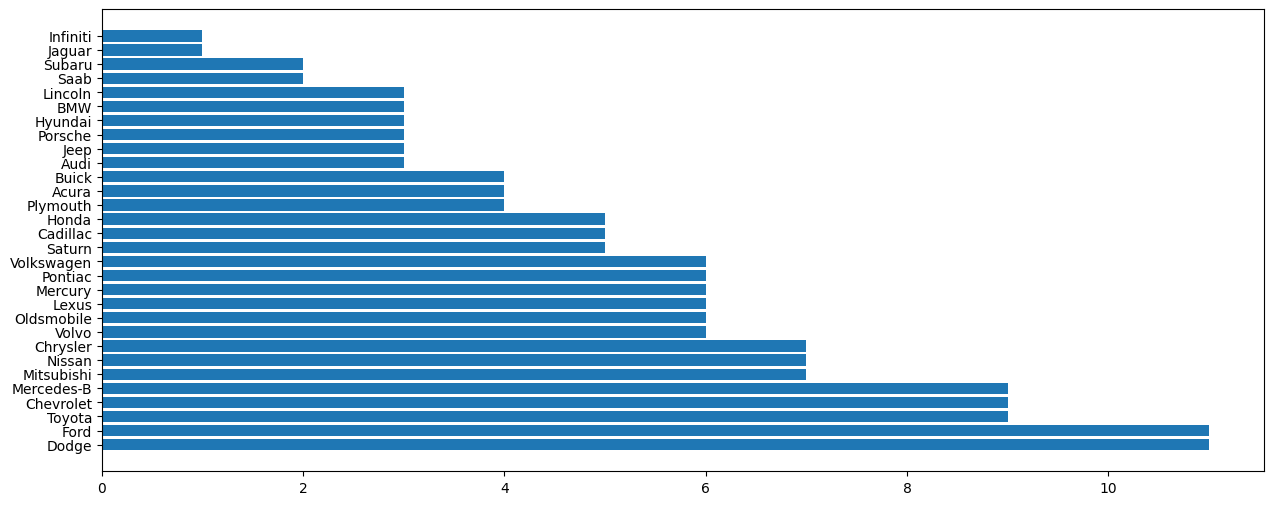

In [23]:
plt.figure(figsize=(15,6))
plt.barh(df["Manufacturer"].value_counts().index , df["Manufacturer"].value_counts().values)

In [24]:
df.head()

,Manufacturer,Model,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Sales_in_thousands
0,Acura,Integra,16.360,Passenger,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150,16.919
1,Acura,TL,19.875,Passenger,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778,39.384
2,Acura,CL,18.225,Passenger,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,77.043591,14.114
3,Acura,RL,29.725,Passenger,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779,8.588
4,Audi,A4,22.255,Passenger,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639,20.397


<Axes: xlabel='__year_resale_value', ylabel='Count'>

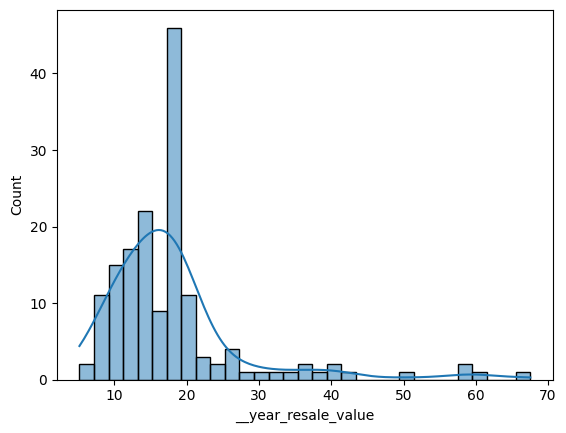

In [25]:
import seaborn as sns
sns.histplot(x=df["__year_resale_value"],kde=True)

* Insight
 - most car  salesin resale value approx 19k dollor.
 - highest resale price in approx 68k $.
 - most car resale value in range of 10k to 20k $.
 

<Axes: xlabel='Sales_in_thousands', ylabel='Count'>

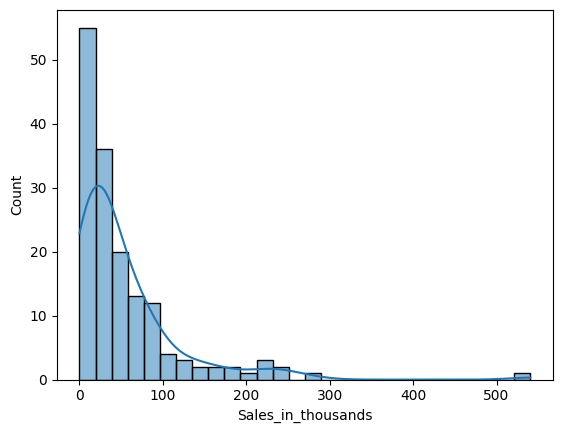

In [26]:
# sales_in thousands
sns.histplot(df["Sales_in_thousands"], kde=True)

In [ ]:
# outliers

# outliers

<Axes: xlabel='Sales_in_thousands'>

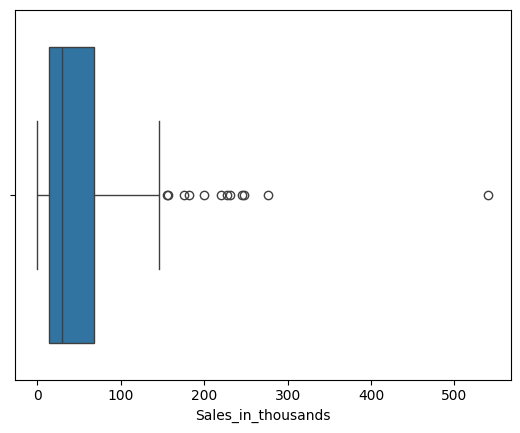

In [ ]:

# vis boxplot, villion plot
sns.boxplot(x=df["Sales_in_thousands"])

In [28]:
# remove the outliers
df[df["Sales_in_thousands"]>500]

,Manufacturer,Model,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Sales_in_thousands
56,Ford,F-Series,15.075,Car,26.935,4.6,220.0,138.5,79.1,224.5,4.241,25.1,18.0,8/16/2012,89.401935,540.561


In [29]:
df[df["Sales_in_thousands"]<500]

,Manufacturer,Model,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Sales_in_thousands
0,Acura,Integra,16.360000,Passenger,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,02-02-2012,58.280150,16.919
1,Acura,TL,19.875000,Passenger,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,06-03-2011,91.370778,39.384
2,Acura,CL,18.225000,Passenger,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,01-04-2012,77.043591,14.114
3,Acura,RL,29.725000,Passenger,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,03-10-2011,91.389779,8.588
4,Audi,A4,22.255000,Passenger,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10-08-2011,62.777639,20.397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,18.072975,Passenger,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812,3.545
153,Volvo,S70,18.072975,Passenger,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495,15.245
154,Volvo,V70,18.072975,Passenger,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978,17.531
155,Volvo,C70,18.072975,Passenger,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357,3.493


In [30]:
# remove the outliers
df = df[df["Sales_in_thousands"]<500]

In [31]:
len(df)

156

In [32]:
# df.drop("sales_in_thousand",axis=0, index=56)

#### REMOVE  OUTLIER

In [33]:
# load the data 
df1 = pd.read_csv("clean_car_data.csv")
df1
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Sales_in_thousands'>

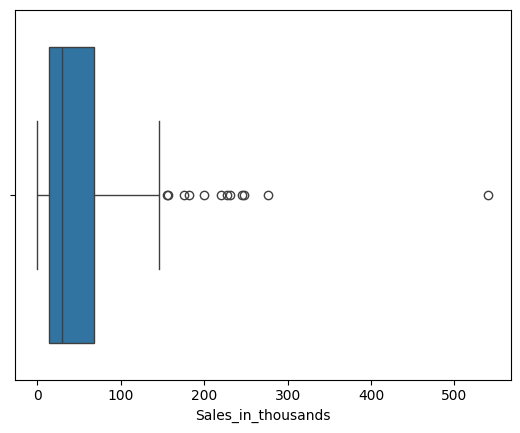

In [34]:
# outliers
# vis boxplot, villion plot
sns.boxplot(x=df1["Sales_in_thousands"])

In [35]:
# remove the outliers
df1 = df1[df1["Sales_in_thousands"]<500]

In [52]:
df1.columns

Index(['Manufacturer', 'Model', '__year_resale_value', 'Vehicle_type',
       'Price_in_thousands', 'Engine_size', 'Horsepower', 'Wheelbase', 'Width',
       'Length', 'Curb_weight', 'Fuel_capacity', 'Fuel_efficiency',
       'Latest_Launch', 'Power_perf_factor', 'Sales_in_thousands'],
      dtype='object')

In [57]:
if df1["__year_resale_value"].dtype =="O":
    print("obj")
else:
    print("num")

num


In [ ]:
df1["Sales_in_thousands"]
for  i in df1.columns:
    sns.boxplot(x=df1[i])
    plt.show()

In [37]:
df1 = df1[df1["Fuel_efficiency"]<40]

In [38]:
df1 = df1[df1["Power_perf_factor"]<170]


Categorical Data Encoding

Data Normalization or Scaling

Feature Engineering

### Handling Skewness


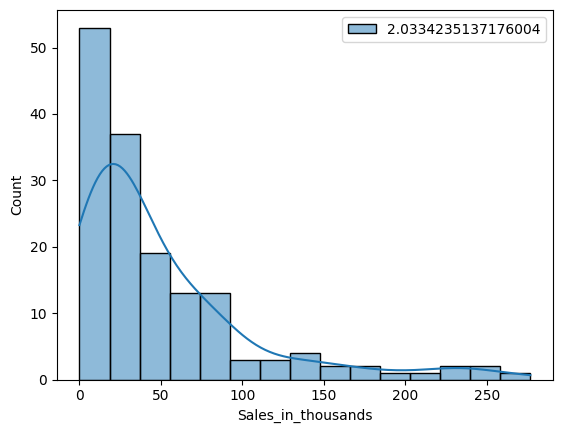

In [39]:
# check the skewness
df["Sales_in_thousands"].skew()

sns.histplot(df["Sales_in_thousands"],kde=True, label =df["Sales_in_thousands"].skew())
plt.legend()
plt.show()


In [40]:
df1.drop("Unnamed: 0",axis=1,inplace=True)

In [61]:
np.square(df["__year_resale_value"])

0      267.649600
1      395.015625
2      332.150625
3      883.575625
4      495.285025
          ...    
152    326.632433
153    326.632433
154    326.632433
155    326.632433
156    326.632433
Name: __year_resale_value, Length: 156, dtype: float64

__year_resale_value


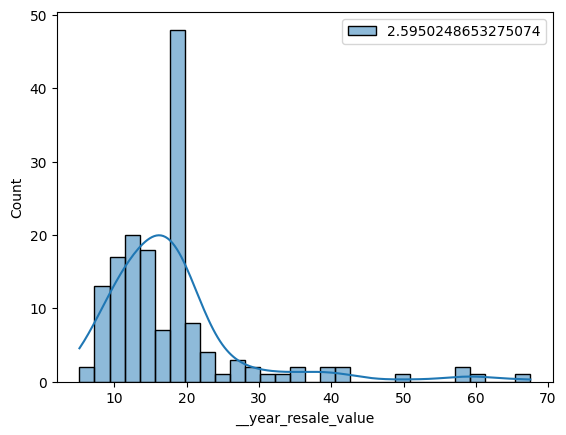

Price_in_thousands


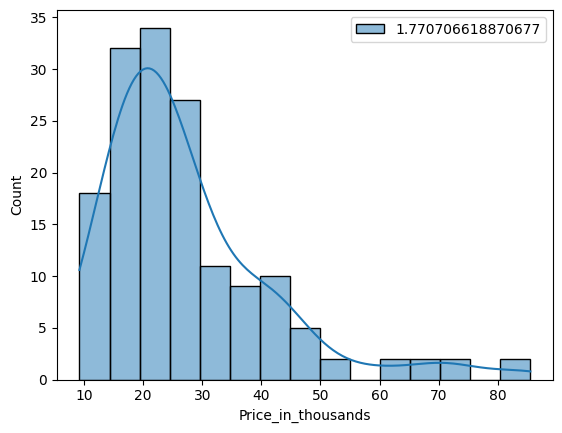

Engine_size


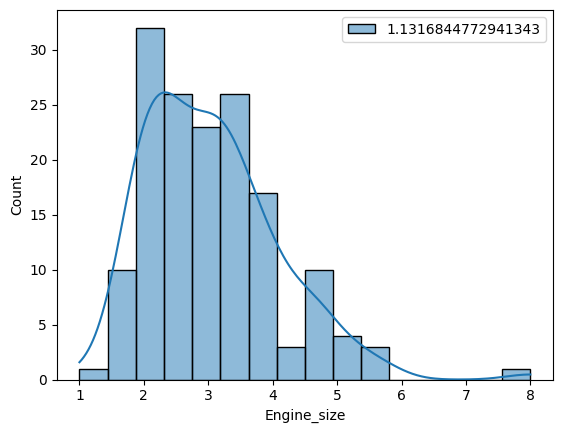

Horsepower


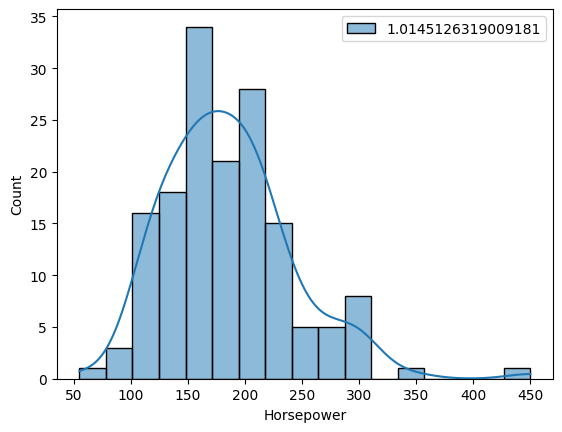

Wheelbase


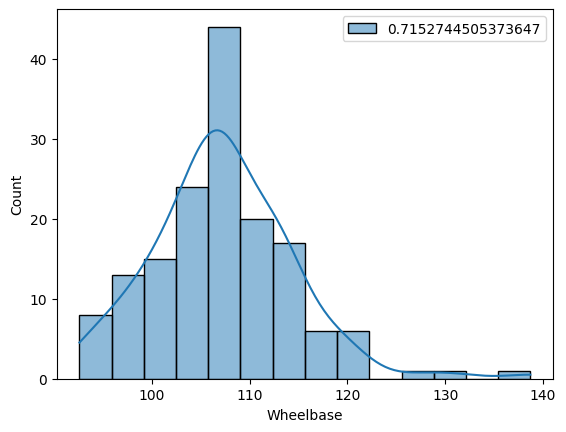

Width


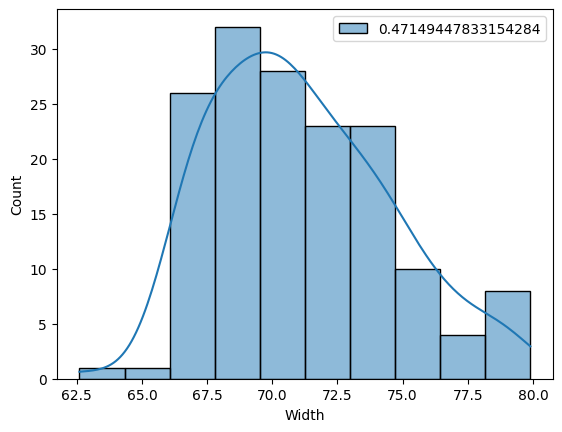

Length


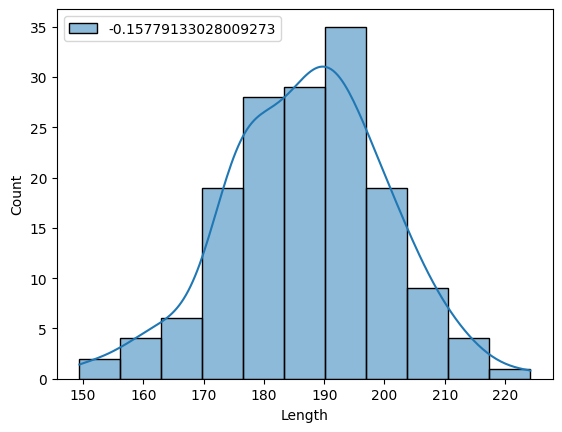

Curb_weight


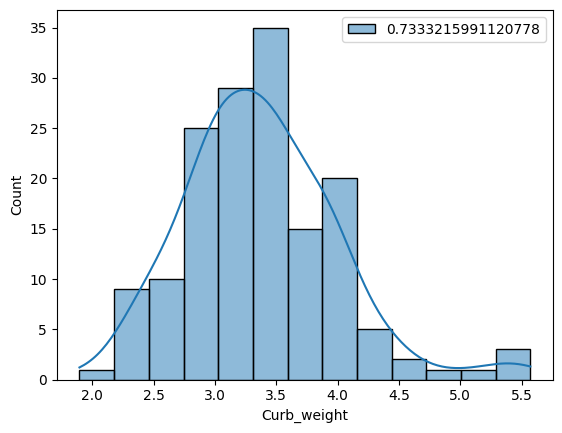

Fuel_capacity


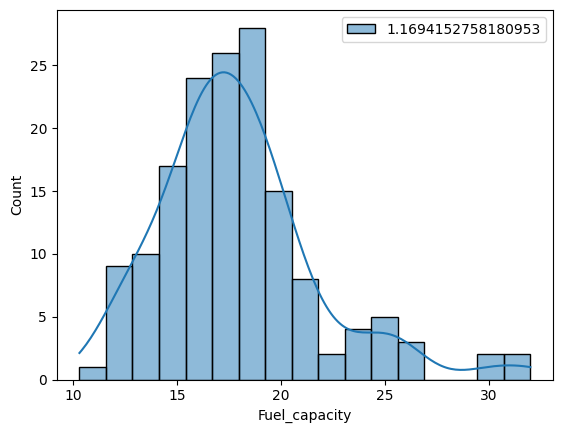

Fuel_efficiency


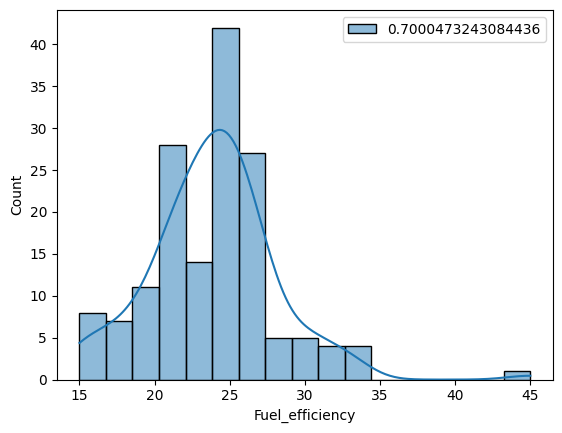

Power_perf_factor


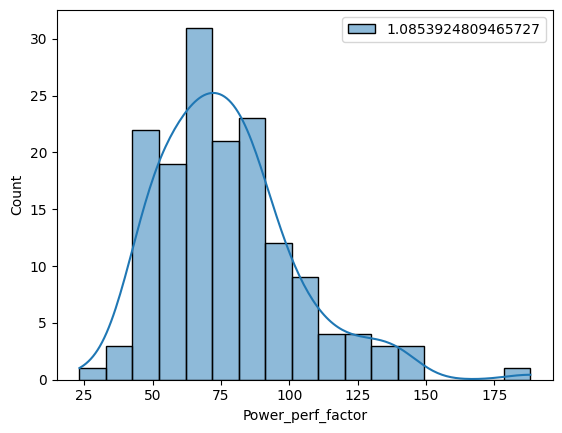

Sales_in_thousands


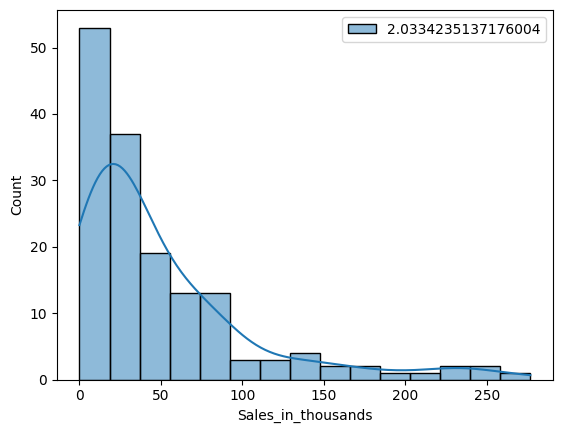

In [41]:
for  i in df1.columns:
    if df1[i].dtypes !="object":
        print(i) 
        sns.histplot(df[i],kde=True, label =df[i].skew())
        plt.legend()
        plt.show()

# To handle the skew using transformations

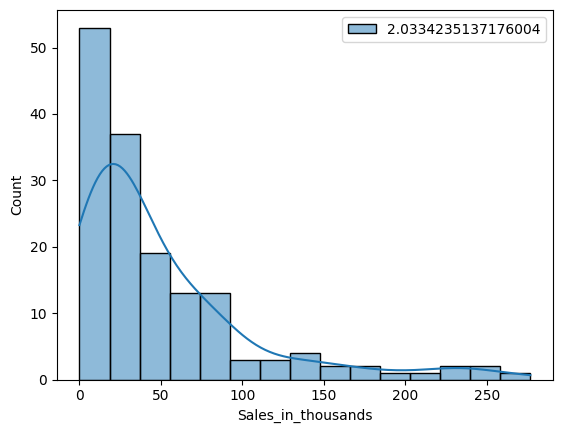

In [62]:


# check the skewness
df["Sales_in_thousands"].skew()

sns.histplot(df["Sales_in_thousands"],kde=True, label =df["Sales_in_thousands"].skew())
plt.legend()
plt.show()

In [65]:
# transform the data 
import numpy as np 
d = np.sqrt(df1["Sales_in_thousands"])


c:\Users\hp\.conda\envs\aienv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [66]:
# 1. sqrt 
# 2. log
# https://machinelearningmastery.com/skewness-be-gone-transformative-tricks-for-data-scientists/
# for box-cox use --> from scipy.stats import boxcox, yeojohnson
# 3. Box-Cox Transformation
# 4. Yeo-Johnson Transformation

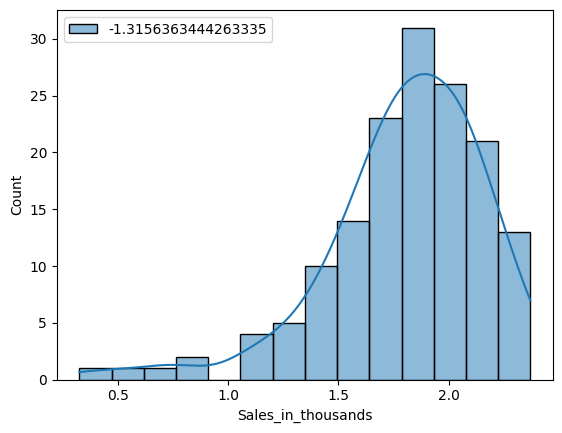

In [67]:
sns.histplot(d, kde=True, label =d.skew())
plt.legend()
plt.show()

In [46]:
df1["Sales_in_thousands"] = d


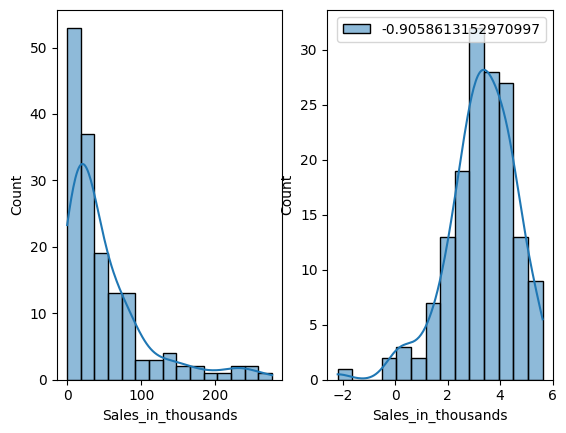

In [47]:
# for 1 column reduce the skewness 
i ="Sales_in_thousands"

plt.subplot(1,2,1)
sns.histplot(df[i],kde=True, label =df[i].skew())

plt.subplot(1,2,2)
sns.histplot(np.log(df[i]),kde=True, label =np.log(df[i]).skew())
plt.legend()
plt.show()

__year_resale_value


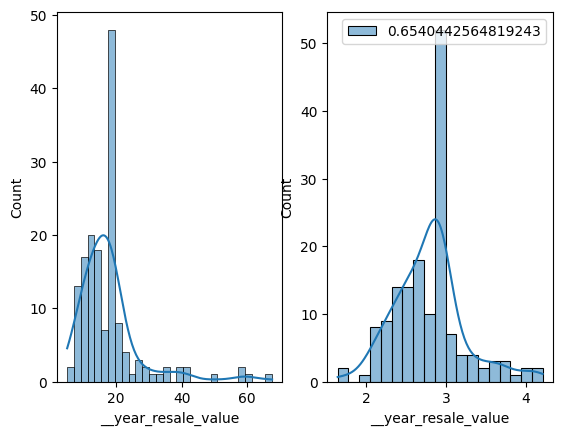

Price_in_thousands


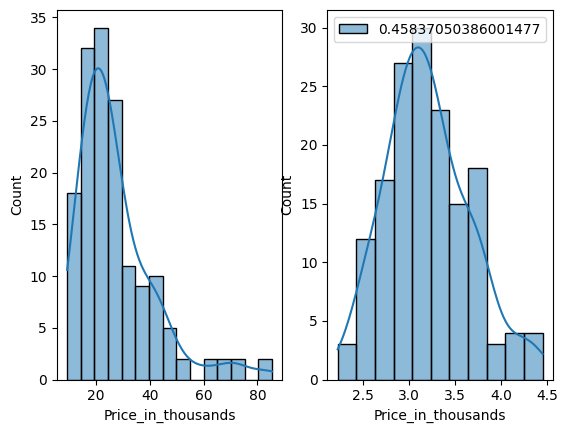

Engine_size


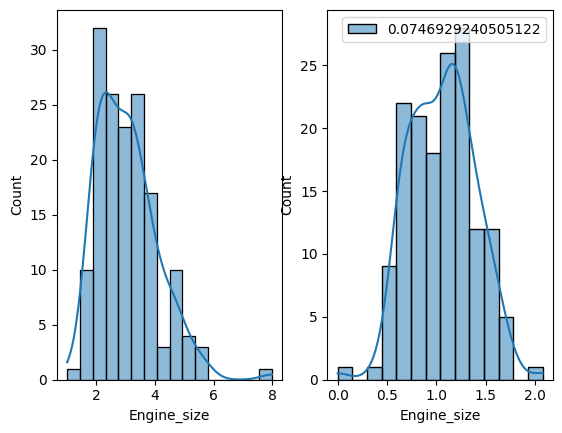

Horsepower


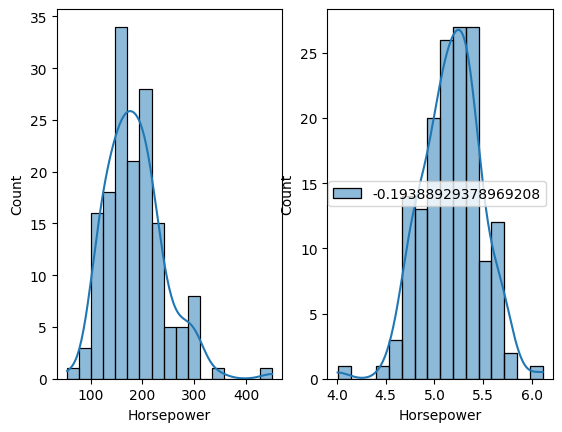

Wheelbase


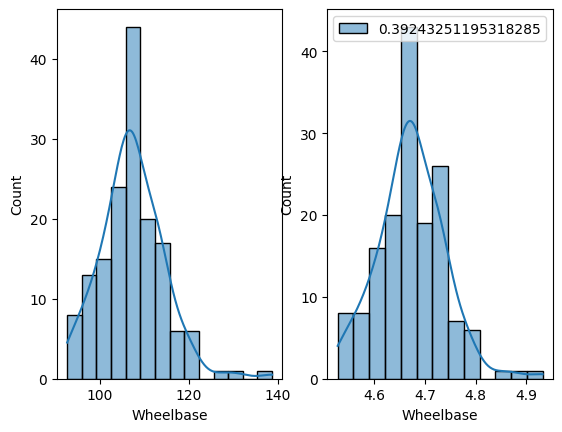

Width


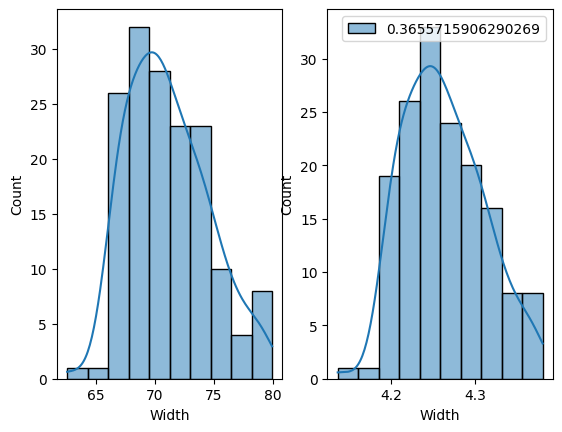

Length


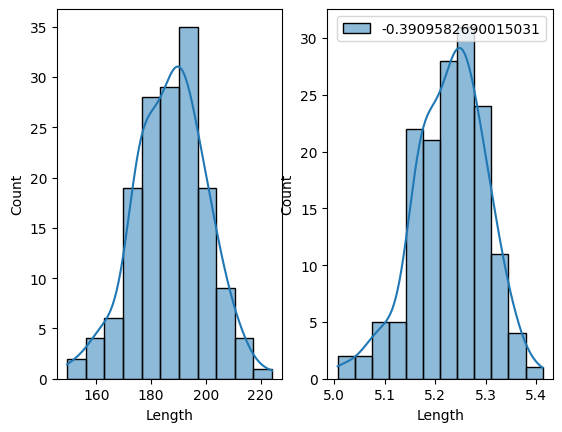

Curb_weight


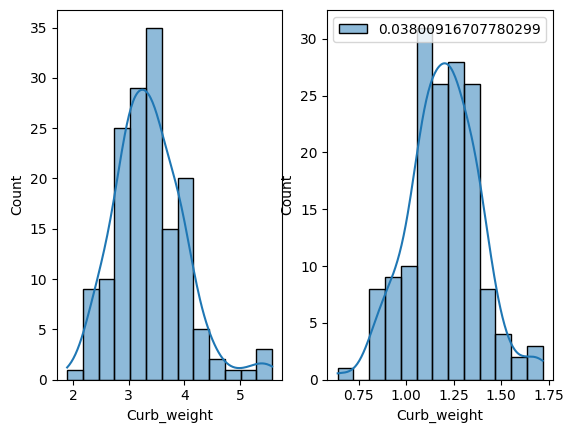

Fuel_capacity


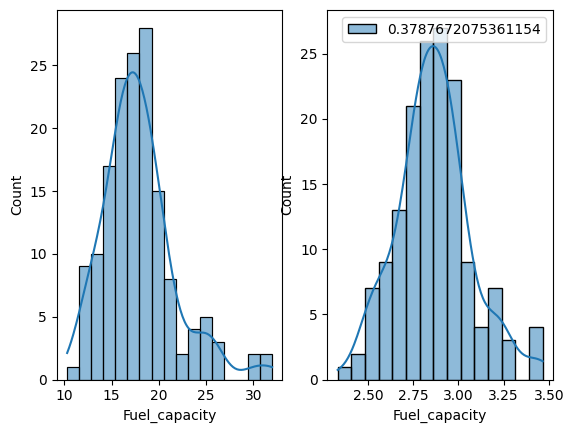

Fuel_efficiency


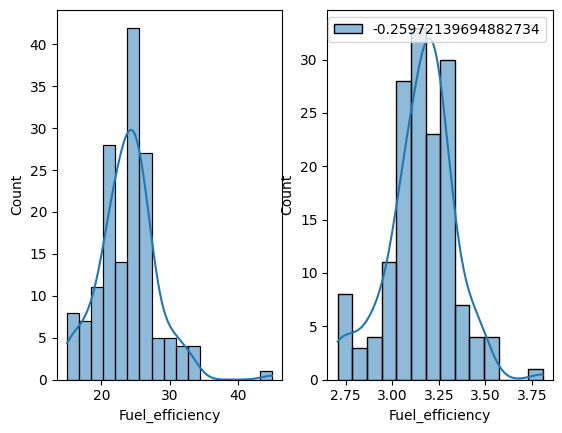

Power_perf_factor


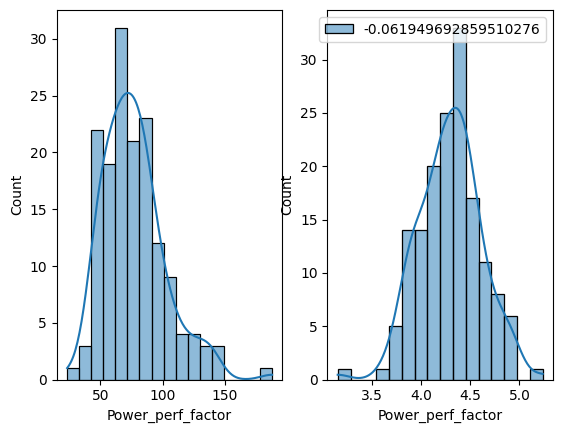

Sales_in_thousands


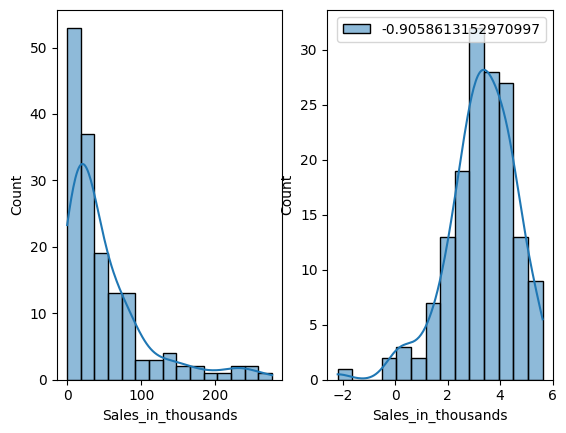

In [48]:
for  i in df1.columns:
    if df1[i].dtypes !="object":
        print(i) 
     
        plt.subplot(1,2,1)
        sns.histplot(df[i],kde=True, label =df[i].skew())

        plt.subplot(1,2,2)
        sns.histplot(np.log(df[i]),kde=True, label =np.log(df[i]).skew())
        plt.legend()
        plt.show()

#### feature scaling
1. Normalization 
2. Standardization

https://www.geeksforgeeks.org/normalization-vs-standardization/

In [49]:
df["Price_in_thousands"]

x_min = df["Price_in_thousands"].min()
x_max = df["Price_in_thousands"].max()

for i in df["Price_in_thousands"]:
    X_new = (i - x_min)/(x_max - x_min)
    print(X_new)

  
# X_new = (X - X_min)/(X_max - X_min)
# z-score = (X - X_mean)/(X_std)


0.16082082213335083
0.2512948272470989
0.23806142842338796
0.4296204025437619
0.19347013702222512
0.32406739657772243
0.6918638956270897
0.2328066609847243
0.3168557005179309
0.38897266111584605
0.16704910509407989
0.21064708581918312
0.29803972988920213
0.24454205730020326
0.40201927489674166
0.46207303481282375
0.39900347472628334
0.28551760309447327
0.4850193404576149
0.05277650298301974
0.09571887497541468
0.12659804628597654
0.13315413361305975
0.19805939815118337
0.4782010096374483
0.061955025240936226
0.0
0.12659804628597654
0.13905461220743462
0.20009178522257917
0.1705893922507048
0.09499770536943554
0.25050809676784896
0.23806142842338796
0.2615878843506195
0.04464695469743658
0.12863043335737234
0.1441683603225595
0.17399855766078803
0.793155444830525
0.13407198583885138
0.15839506982233006
0.12246771126991411
0.10155379269651874
0.22389038221989116
0.13544876417753887
0.037173015144561734
0.1616075526126008
0.10227496230249787
0.11342031075853932
0.040385497934832496
0.1699

## Data Encoding 

In [71]:
df1.head(20)

,Manufacturer,Model,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Sales_in_thousands
0,Acura,Integra,16.360000,Passenger,21.500000,1.8,140.0,101.2,67.3,172.4,2.639000,13.2,28.0,02-02-2012,58.280150,2.828437
1,Acura,TL,19.875000,Passenger,28.400000,3.2,225.0,108.1,70.3,192.9,3.517000,17.2,25.0,06-03-2011,91.370778,3.673360
2,Acura,CL,18.225000,Passenger,27.390755,3.2,225.0,106.9,70.6,192.0,3.470000,17.2,26.0,01-04-2012,77.043591,2.647167
3,Acura,RL,29.725000,Passenger,42.000000,3.5,210.0,114.6,71.4,196.6,3.850000,18.0,22.0,03-10-2011,91.389779,2.150366
4,Audi,A4,22.255000,Passenger,23.990000,1.8,150.0,102.6,68.2,178.0,2.998000,16.4,27.0,10-08-2011,62.777639,3.015388
5,Audi,A6,23.555000,Passenger,33.950000,2.8,200.0,108.7,76.1,192.0,3.561000,18.5,22.0,08-09-2011,84.565105,2.932792
6,Audi,A8,39.000000,Passenger,62.000000,4.2,310.0,113.0,74.0,198.2,3.902000,23.7,21.0,2/27/2012,134.656858,3.195812
7,BMW,323i,18.072975,Passenger,26.990000,2.5,170.0,107.3,68.4,176.0,3.179000,16.6,26.0,6/28/2011,71.191207,2.983002
8,BMW,328i,28.675000,Passenger,33.400000,2.8,193.0,107.3,68.5,176.0,3.197000,16.6,24.0,1/29/2012,81.877069,2.222567
9,BMW,528i,36.125000,Passenger,38.900000,2.8,193.0,111.4,70.9,188.0,3.472000,18.5,25.0,04-04-2011,83.998724,2.863743


In [69]:
df["Vehicle_type"].unique()

array(['Passenger', 'Car'], dtype=object)

In [ ]:
# nominal
# ordinal 
# label encoding
# one-hot encoding

In [ ]:
df["Vehicle_type"].head(20)

In [86]:
# nominal
df["Vehicle_type"].head(20).map({'Passenger':0 ,"Car":1})

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    1
19    0
Name: Vehicle_type, dtype: int64

In [75]:
!pip install scikit-learn

In [78]:
import sklearn

In [84]:
from sklearn import preprocessing

o =  preprocessing.OrdinalEncoder()

o.fit(df[["Vehicle_type"]])
o.transform(df[["Vehicle_type"]])

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],

In [88]:
from sklearn.preprocessing import OrdinalEncoder , OneHotEncoder, LabelEncoder

In [ ]:
l = LabelEncoder()

l.fit(df[["Vehicle_type"]])
l.transform(df[["Vehicle_type"]])

c:\Users\hp\.conda\envs\aienv\Lib\site-packages\sklearn\preprocessing\_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hp\.conda\envs\aienv\Lib\site-packages\sklearn\preprocessing\_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [ ]:
https://scikit-learn.org/stable/modules/preprocessing.html

In [ ]:

# Feature Selection